In [1]:
import pandas as pd
import os
import numpy as np
import nltk
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import spacy
from gensim.models.word2vec import Word2Vec
nlp=spacy.load('en_core_web_sm')
import plotly.express as px
# from umap import UMAP
import warnings
import re
warnings.filterwarnings('ignore')
from tqdm import tqdm

/Users/mstudio/miniconda3/envs/py3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
book={}
replace_dic={}
idx=-1
for index, val in enumerate(os.listdir('../../anti-tom-data/uncle-anti-tom/')):
    if val.endswith('.txt'):
        idx+=1
        with open('../../anti-tom-data/uncle-anti-tom/'+val, 'r') as f:
            text = f.read()
            book[val]=text
        replace_dic[idx]=val

In [3]:
for tom in os.listdir('../../anti-tom-data/uncle-tom'):
    if tom.endswith('txt'):
        with open('../../anti-tom-data/uncle-tom/' + tom, 'r') as f:
            text = f.read()
            book[tom]=text
replace_dic[21]='uncle-tom'

In [4]:
df=pd.DataFrame.from_dict(book, orient='index').T
df.reset_index(drop=True, inplace=True)

In [5]:
clean_book={}
for col in tqdm(df.columns):
    sent=sent_tokenize(df[col][0])
    clean_sent= [re.sub(r'#|\n', '', sentence) for sentence in sent]
    alpha_sent = [re.sub(r'[^a-zA-Z\s]', '', sentence) for sentence in clean_sent]
    lemmatized_sent = []
    # Lemmatize each sentence using spaCy
    for sentence in alpha_sent:
        sentence=sentence.lower()
        doc = nlp(sentence)
        lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]
        # lemmatized_sentence = ' '.join(lemmatized_tokens)
        lemmatized_sent.append(lemmatized_tokens)
    clean_book[col]=lemmatized_sent

  0%|          | 0/26 [00:00<?, ?it/s]

100%|██████████| 26/26 [09:40<00:00, 22.32s/it]


In [6]:
from gensim.models.word2vec import Word2Vec

In [7]:
clean_book.keys()

dict_keys(['randolph.txt', 'mcintosh.txt', 'vidi.txt', 'wiley.txt', 'burwell.txt', 'butt.txt', 'estes.txt', 'cozans.txt', 'hall.txt', 'eastman.txt', 'chase.txt', 'dixon-1.txt', 'dixon-3.txt', 'dixon-2.txt', 'smith.txt', 'schoolcraft.txt', 'criswell.txt', 'cowdin.txt', 'page.txt', 'flanders.txt', 'allen.txt', 'hentz.txt', 'rush.txt', 'simms.txt', 'hale.txt', 'uncle-tom.txt'])

In [8]:
book_model={}
for key in list(clean_book.keys()):
    book_model[key]=Word2Vec(clean_book[key], min_count=5, workers=3, window=3, sg=1)

In [18]:
for key in list(clean_book.keys()):
    try:
        print(key)
        print(book_model[key].wv.most_similar(positive=['slave'], topn=10))
        print('===')
    except:
        print('No slave')
        print('===')

randolph.txt
[('sick', 0.9984856247901917), ('scarcely', 0.9984585046768188), ('meet', 0.9983951449394226), ('air', 0.9983916878700256), ('morning', 0.9983869791030884), ('idea', 0.9983655214309692), ('way', 0.998326301574707), ('mind', 0.9983062148094177), ('year', 0.9982831478118896), ('master', 0.9982715249061584)]
===
mcintosh.txt
[('de', 0.9984554648399353), ('address', 0.998324990272522), ('ready', 0.998302161693573), ('mind', 0.9982908964157104), ('passion', 0.998264491558075), ('companion', 0.9982572793960571), ('certainly', 0.9982566833496094), ('secure', 0.9982336163520813), ('reach', 0.9982317090034485), ('help', 0.9982208013534546)]
===
vidi.txt
[('master', 0.9985506534576416), ('lie', 0.9985501170158386), ('fact', 0.9985227584838867), ('black', 0.9984889030456543), ('perfectly', 0.9984420537948608), ('happy', 0.9983910322189331), ('effect', 0.998389482498169), ('pass', 0.9983605742454529), ('condition', 0.9983503222465515), ('d', 0.9983346462249756)]
===
wiley.txt
[('pass'

In [21]:
for key in list(clean_book.keys()):
    try:
        print(key)
        print(book_model[key].wv.most_similar(positive=['servant'], topn=10))
        print('===')
    except:
        print('No servant')
        print('===')

randolph.txt
[('go', 0.9987863898277283), ('close', 0.998651921749115), ('reach', 0.9986217021942139), ('rest', 0.9986112713813782), ('time', 0.9985973238945007), ('hear', 0.9985970854759216), ('grow', 0.9985945820808411), ('long', 0.9985860586166382), ('new', 0.9985767602920532), ('allow', 0.998561680316925)]
===
mcintosh.txt
[('world', 0.9983221888542175), ('withthe', 0.9982926249504089), ('nature', 0.9982768893241882), ('surprise', 0.9982323050498962), ('suppose', 0.9982069134712219), ('meet', 0.9981865882873535), ('suspect', 0.9981722831726074), ('result', 0.9981631636619568), ('manner', 0.9981408715248108), ('strange', 0.9981271028518677)]
===
vidi.txt
[('stand', 0.9980026483535767), ('raise', 0.9979775547981262), ('oppression', 0.9979457855224609), ('countenance', 0.9979411959648132), ('render', 0.997904896736145), ('society', 0.9978922605514526), ('return', 0.997889518737793), ('mere', 0.9978587627410889), ('draw', 0.9978475570678711), ('course', 0.9978395104408264)]
===
wiley.t

In [22]:
for key in list(clean_book.keys()):
    try:
        print(key)
        print(book_model[key].wv.most_similar(positive=['plantation'], topn=10))
        print('===')
    except:
        print('No plantation')
        print('===')

randolph.txt
[('house', 0.9973254799842834), ('suddenly', 0.9972154498100281), ('cause', 0.9971797466278076), ('inthe', 0.9971216320991516), ('clifford', 0.9971033930778503), ('woman', 0.997096598148346), ('slavery', 0.9970694780349731), ('soon', 0.9970166683197021), ('git', 0.9970018863677979), ('massa', 0.9969813823699951)]
===
mcintosh.txt
[('nature', 0.9984795451164246), ('aunt', 0.9983787536621094), ('impossible', 0.9983683228492737), ('begin', 0.9983646273612976), ('scene', 0.9983147382736206), ('companion', 0.9983108043670654), ('quiet', 0.9983059763908386), ('voice', 0.9982972145080566), ('somewhat', 0.9982871413230896), ('wear', 0.9982826709747314)]
===
vidi.txt
[('duty', 0.9978486895561218), ('service', 0.9977918267250061), ('way', 0.9977585077285767), ('away', 0.9977364540100098), ('different', 0.9977014064788818), ('perfectly', 0.9976958632469177), ('shall', 0.9976873993873596), ('render', 0.997685968875885), ('observe', 0.9976729154586792), ('freedom', 0.9976562857627869)]

In [23]:
for key in list(clean_book.keys()):
    try:
        print(key)
        print(book_model[key].wv.most_similar(positive=['field'], topn=10))
        print('===')
    except:
        print('No field')
        print('===')

randolph.txt
[('rich', 0.998222291469574), ('country', 0.9982104897499084), ('operative', 0.9982081055641174), ('new', 0.9982047080993652), ('similar', 0.9981589317321777), ('find', 0.9981467127799988), ('bear', 0.9981441497802734), ('talk', 0.9981054663658142), ('hold', 0.9980977773666382), ('sight', 0.9980701208114624)]
===
mcintosh.txt
[('scarcely', 0.9974395632743835), ('arrangement', 0.9974106550216675), ('home', 0.9973991513252258), ('remain', 0.997344434261322), ('set', 0.9973415732383728), ('dark', 0.9973103404045105), ('sleep', 0.9972997307777405), ('s', 0.9972966909408569), ('land', 0.9972944259643555), ('impossible', 0.9972841143608093)]
===
vidi.txt
[('word', 0.997682511806488), ('pure', 0.9976109266281128), ('head', 0.9975938200950623), ('inthe', 0.9975729584693909), ('purpose', 0.997555136680603), ('shake', 0.9975244998931885), ('pleasure', 0.9975051283836365), ('produce', 0.9974324703216553), ('fact', 0.9973922371864319), ('fail', 0.9973634481430054)]
===
wiley.txt
[('st

In [28]:
for key in list(clean_book.keys()):
    try:
        print(key)
        print(book_model[key].wv.most_similar(positive=['land'], topn=10))
        print('===')
    except:
        print('No land')
        print('===')

randolph.txt
[('slavery', 0.9984269738197327), ('pass', 0.9983879327774048), ('appear', 0.9983694553375244), ('wife', 0.9983487725257874), ('go', 0.9983358383178711), ('arm', 0.9983225464820862), ('d', 0.998301088809967), ('fill', 0.9982988238334656), ('window', 0.9982960224151611), ('morning', 0.9982753992080688)]
===
mcintosh.txt
[('address', 0.998607873916626), ('scarcely', 0.9985971450805664), ('pleasure', 0.9985895156860352), ('woman', 0.9985299706459045), ('kind', 0.9985293745994568), ('feel', 0.9985274076461792), ('course', 0.9985224604606628), ('comfort', 0.9985200762748718), ('worth', 0.9985093474388123), ('air', 0.9985079169273376)]
===
vidi.txt
[('ill', 0.9986717700958252), ('come', 0.9985249638557434), ('service', 0.9984445571899414), ('air', 0.9984403252601624), ('person', 0.998342752456665), ('moment', 0.9983278512954712), ('spot', 0.9983206987380981), ('away', 0.9983120560646057), ('negro', 0.9982956647872925), ('white', 0.9982873797416687)]
===
wiley.txt
[('swamp', 0.99

In [26]:
for key in list(clean_book.keys()):
    try:
        print(key)
        print(book_model[key].wv.most_similar(positive=['owner'], topn=10))
        print('===')
    except:
        print('No slave')
        print('===')

randolph.txt
No slave
===
mcintosh.txt
No slave
===
vidi.txt
[('consider', 0.996243953704834), ('stand', 0.9962102770805359), ('north', 0.9961057305335999), ('wrong', 0.9959734082221985), ('mother', 0.995914876461029), ('life', 0.9958541393280029), ('oppression', 0.9957992434501648), ('principle', 0.9957941174507141), ('sure', 0.9957422018051147), ('unknown', 0.9957298040390015)]
===
wiley.txt
[('feel', 0.9967470765113831), ('mind', 0.9966166019439697), ('attention', 0.9966045022010803), ('cover', 0.9966033101081848), ('hand', 0.9965043067932129), ('swamp', 0.9964794516563416), ('course', 0.9964582920074463), ('hear', 0.9963977932929993), ('want', 0.9963817596435547), ('town', 0.9963482618331909)]
===
burwell.txt
[('mistress', 0.9941678047180176), ('title', 0.9940587282180786), ('run', 0.9939308762550354), ('long', 0.9938637614250183), ('pay', 0.9937488436698914), ('way', 0.9936301112174988), ('git', 0.9935997128486633), ('land', 0.9935617446899414), ('old', 0.9935103058815002), ('shal

In [38]:
for key in list(clean_book.keys()):
    try:
        print(key)
        print(book_model[key].wv.most_similar(positive=['house'], topn=10))
        print('===')
    except:
        print('No house')
        print('===')


randolph.txt
[('death', 0.9984791874885559), ('family', 0.9984357357025146), ('walk', 0.9984098076820374), ('bring', 0.9984073042869568), ('well', 0.9984050989151001), ('new', 0.9984029531478882), ('find', 0.9983757138252258), ('fly', 0.9983730912208557), ('life', 0.9983692169189453), ('promise', 0.9983625411987305)]
===
mcintosh.txt
[('soul', 0.9980683326721191), ('content', 0.9980648159980774), ('observe', 0.9980528354644775), ('woman', 0.9980148673057556), ('southern', 0.9980089664459229), ('sleep', 0.9979864358901978), ('object', 0.9979814887046814), ('form', 0.9979762434959412), ('crowd', 0.9979607462882996), ('scarcely', 0.9979342222213745)]
===
vidi.txt
[('possess', 0.998418927192688), ('deep', 0.998389482498169), ('character', 0.9983500242233276), ('beg', 0.998348593711853), ('freedom', 0.9983242154121399), ('thing', 0.9983023405075073), ('engage', 0.9982940554618835), ('law', 0.9982928037643433), ('dear', 0.9982866048812866), ('blessing', 0.998254656791687)]
===
wiley.txt
[('o

In [37]:
for key in list(clean_book.keys()):
    try:
        print(key)
        print(book_model[key].wv.most_similar(positive=['manner'], topn=10))
        print('===')
    except:
        print('No manner')
        print('===')

randolph.txt
[('street', 0.9981711506843567), ('air', 0.9981091618537903), ('sure', 0.9980871677398682), ('dead', 0.9980831742286682), ('year', 0.9980806112289429), ('high', 0.9980798363685608), ('immediately', 0.9980489015579224), ('go', 0.9980391263961792), ('light', 0.9980053901672363), ('lad', 0.99799644947052)]
===
mcintosh.txt
[('somewhat', 0.9987767934799194), ('note', 0.9987505674362183), ('flower', 0.9986999034881592), ('strange', 0.9986348748207092), ('result', 0.9986310005187988), ('care', 0.9985966682434082), ('large', 0.9985758662223816), ('interview', 0.9985711574554443), ('far', 0.998570442199707), ('daughter', 0.9985632300376892)]
===
vidi.txt
[('head', 0.9986554980278015), ('countenance', 0.9986172318458557), ('condition', 0.9985280632972717), ('meeting', 0.9985179901123047), ('account', 0.998511552810669), ('world', 0.9985032081604004), ('effect', 0.9985026121139526), ('stand', 0.9984829425811768), ('believe', 0.9984737038612366), ('country', 0.9984641075134277)]
===


In [39]:
for key in list(clean_book.keys()):
    try:
        print(key)
        print(book_model[key].wv.most_similar(positive=['estate'], topn=10))
        print('===')
    except:
        print('No estate')
        print('===')

randolph.txt
[('neighborhood', 0.9946282505989075), ('rise', 0.99461430311203), ('free', 0.9945276379585266), ('high', 0.9945221543312073), ('compel', 0.994516909122467), ('possible', 0.9944856762886047), ('slavery', 0.9944698214530945), ('schoolhouse', 0.9943937659263611), ('rosa', 0.9943302273750305), ('tell', 0.994326651096344)]
===
mcintosh.txt
[('welcome', 0.9977964758872986), ('care', 0.9977815747261047), ('happiness', 0.9977511167526245), ('sorrow', 0.9976498484611511), ('interview', 0.9976386427879333), ('heaven', 0.9976080060005188), ('dream', 0.9976047873497009), ('result', 0.9975823163986206), ('overbear', 0.9975818395614624), ('secret', 0.9975763559341431)]
===
vidi.txt
No estate
===
wiley.txt
No estate
===
burwell.txt
[('henry', 0.9973248243331909), ('pay', 0.9972513914108276), ('not', 0.9972471594810486), ('law', 0.9972288012504578), ('find', 0.9971431493759155), ('great', 0.9971227645874023), ('right', 0.9970934391021729), ('carry', 0.9970847368240356), ('plaintiff', 0.9

In [12]:
book_vector={}
for title in list(book_model.keys()):
    key_vector={}
    for key in book_model[title].wv.key_to_index.keys():
        key_vector[key]=book_model[title].wv[key]
    book_vector[title]=key_vector


In [13]:
book_vector_df_list=[]
for key in list(book_vector.keys()):
    key_vector=pd.DataFrame.from_dict(book_vector[key], orient='index').reset_index()
    key_vector['title']=key
    book_vector_df_list.append(key_vector)

In [14]:
book_vector_df=pd.concat(book_vector_df_list)
book_vector_df.reset_index(drop=True, inplace=True)

In [15]:
from sklearn.decomposition import PCA
PCA=PCA(n_components=2)
components=PCA.fit_transform(book_vector_df.loc[:, 0:99].reset_index(drop=True))


In [16]:
book_vector_df

,index,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,title
0,say,-0.085732,0.116723,0.048519,-0.037076,-0.023026,-0.236422,0.117586,0.448043,-0.139589,...,0.070006,0.003089,0.014487,0.304024,0.254025,0.084056,-0.252310,0.035367,-0.101298,randolph.txt
1,isabel,-0.101900,0.129987,0.057757,-0.038003,-0.006312,-0.243119,0.114482,0.460789,-0.145662,...,0.070970,0.006239,0.004543,0.304712,0.263502,0.113726,-0.255252,0.023457,-0.105044,randolph.txt
2,p,-0.064521,0.095089,-0.000874,-0.040650,0.003087,-0.179405,0.071005,0.439502,-0.196473,...,0.113772,0.050366,0.025646,0.312785,0.227585,0.118107,-0.210437,0.112847,-0.126684,randolph.txt
3,not,-0.099054,0.131529,0.047545,-0.057984,-0.012259,-0.237260,0.119669,0.453199,-0.128278,...,0.074042,-0.004278,0.007767,0.312252,0.256779,0.103798,-0.262676,0.038411,-0.113116,randolph.txt
4,walworth,-0.096083,0.116162,0.040863,-0.045622,-0.010793,-0.222557,0.114869,0.444611,-0.140626,...,0.066770,0.006654,0.010069,0.297344,0.244224,0.105293,-0.238109,0.037670,-0.103295,randolph.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35962,doctrine,-0.109931,0.074152,0.014886,0.056065,0.020809,-0.134882,0.085244,0.225405,-0.081788,...,0.070916,0.013550,0.031022,0.164851,0.165711,0.056847,-0.174865,0.102513,0.018259,uncle-tom.txt
35963,hismother,-0.099252,0.069924,0.013325,0.043231,0.005511,-0.123143,0.076080,0.207485,-0.078438,...,0.045877,0.022829,0.025901,0.132681,0.144710,0.052031,-0.169070,0.078775,0.019505,uncle-tom.txt
35964,completely,-0.102383,0.089278,0.019639,0.054213,0.007058,-0.152198,0.096880,0.256263,-0.102121,...,0.074303,0.017514,0.044528,0.160478,0.170779,0.052299,-0.202527,0.108943,0.017535,uncle-tom.txt
35965,painful,-0.105713,0.078026,0.025724,0.060490,0.008566,-0.134892,0.088455,0.236349,-0.093671,...,0.064564,0.016140,0.039310,0.152793,0.173333,0.050745,-0.175226,0.089941,0.018198,uncle-tom.txt


In [17]:
components_df=pd.DataFrame(components)
components_df.rename(columns={0:'x', 1:'y'}, inplace=True)

In [18]:
merge=pd.merge(components_df, book_vector_df, left_index=True, right_index=True).reset_index(drop=True)

In [19]:
merge[merge['title']=='burwell.txt']

,x,y,index,0,1,2,3,4,5,6,...,91,92,93,94,95,96,97,98,99,title
5463,-0.457724,-0.006548,acre,-0.025425,0.058434,0.064130,0.050644,-0.018751,-0.084062,0.042756,...,0.002596,-0.038910,0.059825,0.060603,0.069259,-0.028459,-0.049727,0.017072,0.044629,burwell.txt
5464,-0.353546,0.011203,black,-0.030400,0.070069,0.080487,0.053153,-0.005234,-0.102273,0.044594,...,-0.003360,-0.055741,0.066808,0.048058,0.076467,-0.025008,-0.056210,0.017062,0.050348,burwell.txt
5465,-0.424716,0.009372,white,-0.020926,0.062062,0.059864,0.038386,-0.003815,-0.072617,0.033993,...,0.005955,-0.040310,0.059619,0.053777,0.071158,-0.021772,-0.045130,0.032414,0.035329,burwell.txt
5466,-0.464355,-0.006070,p,-0.026253,0.062729,0.061610,0.037035,-0.008344,-0.083161,0.036434,...,0.000528,-0.049746,0.062784,0.053018,0.060983,-0.020390,-0.050683,0.015528,0.031554,burwell.txt
5467,-0.634494,0.006874,vs,-0.022127,0.037564,0.031627,0.025532,-0.001608,-0.042011,0.027544,...,-0.004306,-0.018295,0.032603,0.034180,0.030810,-0.008548,-0.018429,0.014648,0.031598,burwell.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6124,-0.633737,-0.012004,welfare,-0.001530,0.037572,0.032299,0.026457,-0.018462,-0.052671,0.017352,...,0.001323,-0.048252,0.046916,0.016377,0.038520,-0.023451,-0.020786,0.014042,0.029495,burwell.txt
6125,-0.584325,-0.003645,remark,0.000280,0.033684,0.038498,0.026779,-0.024773,-0.066384,0.013171,...,0.006880,-0.042790,0.043892,0.015866,0.033283,-0.022718,-0.025641,0.021825,0.026139,burwell.txt
6126,-0.579196,0.000196,leg,-0.006130,0.044926,0.048706,0.032926,-0.009057,-0.055327,0.024439,...,-0.010229,-0.048853,0.054172,0.032399,0.033597,-0.025312,-0.038122,0.024105,0.037764,burwell.txt
6127,-0.636365,-0.025490,jubilee,-0.011173,0.033929,0.045365,0.014210,-0.021183,-0.054680,0.010601,...,-0.005050,-0.043520,0.039258,0.024639,0.045522,-0.024738,-0.031445,0.015805,0.016324,burwell.txt


In [20]:
merge[merge['title']=='cozans.txt']

,x,y,index,0,1,2,3,4,5,6,...,91,92,93,94,95,96,97,98,99,title
8878,-0.916910,-0.044219,eva,-0.000536,0.000236,0.005103,0.009009,-0.009303,-0.007117,0.006459,...,0.000190,0.003474,0.000218,0.009619,0.005061,-0.008917,-0.007042,0.000901,0.006393,cozans.txt
8879,-0.927679,-0.038351,p,-0.008620,0.003666,0.005190,0.005742,0.007467,-0.006168,0.001106,...,-0.001576,0.002197,-0.007882,-0.002717,0.002663,0.005347,-0.002392,-0.009510,0.004506,cozans.txt
8880,-0.923739,-0.036680,l,0.000092,0.003079,-0.006813,-0.001377,0.007668,0.007346,-0.003672,...,0.005703,0.009179,-0.004101,0.007968,0.005376,0.005880,0.000510,0.008213,-0.007021,cozans.txt
8881,-0.932476,-0.045331,street,-0.008244,0.009301,-0.000198,-0.001968,0.004604,-0.004096,0.002744,...,-0.001064,-0.000795,-0.002563,0.009684,-0.000459,0.005875,-0.007449,-0.002506,-0.005551,cozans.txt
8882,-0.932258,-0.023560,little,-0.007139,0.001241,-0.007177,-0.002245,0.003719,0.005833,0.001198,...,-0.004713,0.005281,-0.004233,0.002642,-0.008046,0.006210,0.004819,0.000787,0.003013,cozans.txt
8883,-0.914220,-0.044186,fulton,-0.008738,0.002138,-0.000874,-0.009326,-0.009430,-0.001414,0.004437,...,0.008942,-0.008214,-0.003016,0.009899,0.005107,-0.001585,-0.008702,0.002962,-0.006683,cozans.txt


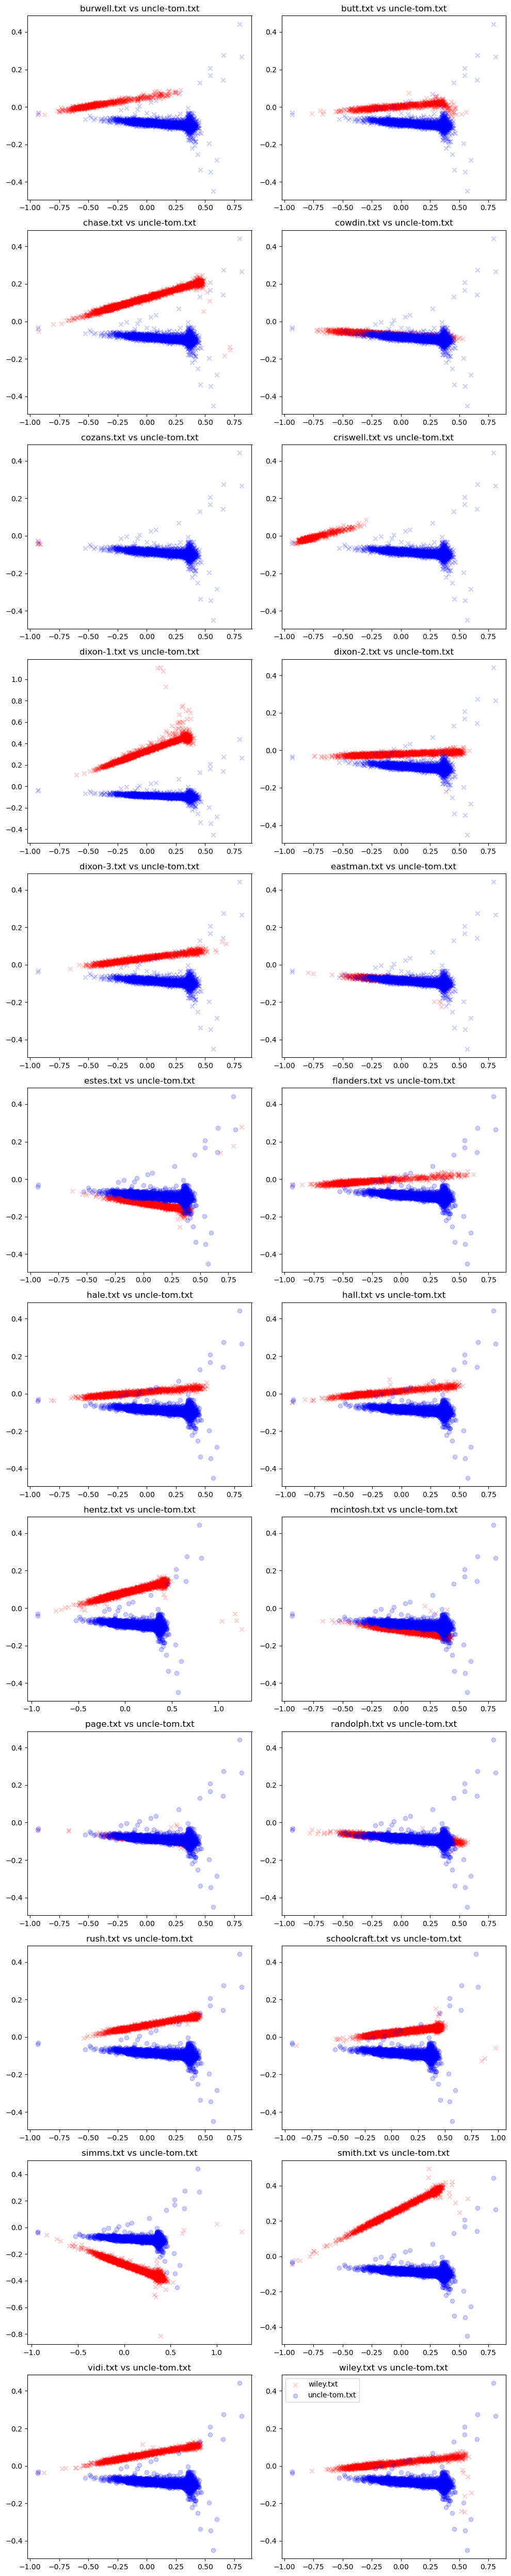

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(12,2, figsize=(10, 50))
# fig.set_size_inches(50, 50)

ax[0][0].scatter(
    merge[merge['title']=='burwell.txt']['x'], merge[merge['title']=='burwell.txt']['y'],
    marker='x', c='red', label='burwell.txt', alpha=0.2
)
ax[0][0].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='x', c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[0][0].set_title('burwell.txt vs uncle-tom.txt')

ax[0][1].scatter(
    merge[merge['title']=='butt.txt']['x'], merge[merge['title']=='butt.txt']['y'],
    marker='x', c='red', label='butt.txt', alpha=0.2
)
ax[0][1].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='x', c='blue', label='cowdin.txt', alpha=0.2
)
ax[0][1].set_title('butt.txt vs uncle-tom.txt')

ax[1][0].scatter(
    merge[merge['title']=='chase.txt']['x'], merge[merge['title']=='chase.txt']['y'],
    marker='x', c='red', label='chase.txt', alpha=0.2
)
ax[1][0].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='x', c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[1][0].set_title('chase.txt vs uncle-tom.txt')

ax[1][1].scatter(
    merge[merge['title']=='cowdin.txt']['x'], merge[merge['title']=='cowdin.txt']['y'],
    marker='x', c='red', label='cowdin.txt', alpha=0.2
)
ax[1][1].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='x', c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[1][1].set_title('cowdin.txt vs uncle-tom.txt')

ax[2][0].scatter(
    merge[merge['title']=='cozans.txt']['x'], merge[merge['title']=='cozans.txt']['y'],
    marker='x', c='red', label='cozans.txt', alpha=0.2
)
ax[2][0].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='x', c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[2][0].set_title('cozans.txt vs uncle-tom.txt')

ax[2][1].scatter(
    merge[merge['title']=='criswell.txt']['x'], merge[merge['title']=='criswell.txt']['y'],
    marker='x', c='red', label='criswell.txt', alpha=0.2
)
ax[2][1].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='x', c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[2][1].set_title('criswell.txt vs uncle-tom.txt')

ax[3][0].scatter(
    merge[merge['title']=='dixon-1.txt']['x'], merge[merge['title']=='dixon-1.txt']['y'],
    marker='x', c='red', label='dixon-1.txt', alpha=0.2
)
ax[3][0].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='x', c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[3][0].set_title('dixon-1.txt vs uncle-tom.txt')

ax[3][1].scatter(
    merge[merge['title']=='dixon-2.txt']['x'], merge[merge['title']=='dixon-2.txt']['y'],
    marker='x', c='red', label='dixon-2.txt', alpha=0.2
)
ax[3][1].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='x', c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[3][1].set_title('dixon-2.txt vs uncle-tom.txt')

ax[4][0].scatter(
    merge[merge['title']=='dixon-3.txt']['x'], merge[merge['title']=='dixon-3.txt']['y'],
    marker='x', c='red', label='flanders.txt', alpha=0.2
)
ax[4][0].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='x', c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[4][0].set_title('dixon-3.txt vs uncle-tom.txt')

ax[4][1].scatter(
    merge[merge['title']=='eastman.txt']['x'], merge[merge['title']=='eastman.txt']['y'],
    marker='x', c='red', label='hale.txt', alpha=0.2
)
ax[4][1].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='x', c='blue', label='hale.txt', alpha=0.2
)
ax[4][1].set_title('eastman.txt vs uncle-tom.txt')

ax[5][0].scatter(
    merge[merge['title']=='estes.txt']['x'], merge[merge['title']=='estes.txt']['y'],
    marker='x', c='red', label='hall.txt', alpha=0.2
)
ax[5][0].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='o', c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[5][0].set_title('estes.txt vs uncle-tom.txt')

ax[5][1].scatter(
    merge[merge['title']=='flanders.txt']['x'], merge[merge['title']=='flanders.txt']['y'],
    marker='x', c='red', label='flanders.txt', alpha=0.2
)
ax[5][1].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='o', c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[5][1].set_title('flanders.txt vs uncle-tom.txt')

ax[6][0].scatter(
    merge[merge['title']=='hale.txt']['x'], merge[merge['title']=='hale.txt']['y'],
    marker='x', c='red', label='hale.txt', alpha=0.2
)
ax[6][0].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='o', c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[6][0].set_title('hale.txt vs uncle-tom.txt')

ax[6][1].scatter(
    merge[merge['title']=='hall.txt']['x'], merge[merge['title']=='hall.txt']['y'],
    marker='x', c='red', label='hall.txt', alpha=0.2
)
ax[6][1].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='o', c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[6][1].set_title('hall.txt vs uncle-tom.txt')

ax[7][0].scatter(
    merge[merge['title']=='hentz.txt']['x'], merge[merge['title']=='hentz.txt']['y'],
    marker='x', c='red', label='hentz.txt', alpha=0.2
)
ax[7][0].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='o', c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[7][0].set_title('hentz.txt vs uncle-tom.txt')

ax[7][1].scatter(
    merge[merge['title']=='mcintosh.txt']['x'], merge[merge['title']=='mcintosh.txt']['y'],
    marker='x', c='red', label='mcintosh.txt', alpha=0.2
)
ax[7][1].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='o', c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[7][1].set_title('mcintosh.txt vs uncle-tom.txt')

ax[8][0].scatter(
    merge[merge['title']=='page.txt']['x'], merge[merge['title']=='page.txt']['y'],
    marker='x', c='red', label='page.txt', alpha=0.2
)
ax[8][0].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    marker='o', c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[8][0].set_title('page.txt vs uncle-tom.txt')

ax[8][1].scatter(
    merge[merge['title']=='randolph.txt']['x'], merge[merge['title']=='randolph.txt']['y'],
    marker='x', c='red', label='randolph.txt', alpha=0.2
)
ax[8][1].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[8][1].set_title('randolph.txt vs uncle-tom.txt')

ax[9][0].scatter(
    merge[merge['title']=='rush.txt']['x'], merge[merge['title']=='rush.txt']['y'],
    marker='x', c='red', label='rush.txt', alpha=0.2
)
ax[9][0].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[9][0].set_title('rush.txt vs uncle-tom.txt')

ax[9][1].scatter(
    merge[merge['title']=='schoolcraft.txt']['x'], merge[merge['title']=='schoolcraft.txt']['y'],
    marker='x', c='red', label='schoolcraft.txt', alpha=0.2
)
ax[9][1].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[9][1].set_title('schoolcraft.txt vs uncle-tom.txt')

ax[10][0].scatter(
    merge[merge['title']=='simms.txt']['x'], merge[merge['title']=='simms.txt']['y'],
    marker='x', c='red', label='stowe.txt', alpha=0.2
)
ax[10][0].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[10][0].set_title('simms.txt vs uncle-tom.txt')

ax[10][1].scatter(
    merge[merge['title']=='smith.txt']['x'], merge[merge['title']=='smith.txt']['y'],
    marker='x', c='red', label='smith.txt', alpha=0.2
)
ax[10][1].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[10][1].set_title('smith.txt vs uncle-tom.txt')

ax[11][0].scatter(
    merge[merge['title']=='vidi.txt']['x'], merge[merge['title']=='vidi.txt']['y'],
    marker='x', c='red', label='vidi.txt', alpha=0.2
)
ax[11][0].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[11][0].set_title('vidi.txt vs uncle-tom.txt')

ax[11][1].scatter(
    merge[merge['title']=='wiley.txt']['x'], merge[merge['title']=='wiley.txt']['y'],
    marker='x', c='red', label='wiley.txt', alpha=0.2
)
ax[11][1].scatter(
    merge[merge['title']=='uncle-tom.txt']['x'], merge[merge['title']=='uncle-tom.txt']['y'],
    c='blue', label='uncle-tom.txt', alpha=0.2
)
ax[11][1].set_title('wiley.txt vs uncle-tom.txt')

# fig.title('Word2Vec Embeddings of Uncle Tom\'s Cabin and Anti-Tom Novels')
plt.legend()
plt.tight_layout()  
# plt.savefig('figure/anti-tom-centroids.png', dpi=300, bbox_inches='tight')
plt.show()